1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

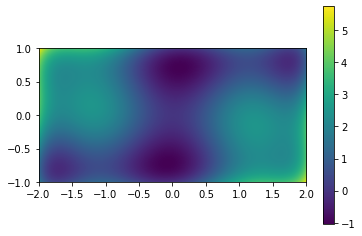

      fun: -1.0316284534879745
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.75175455e-06,  3.24185122e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 7
     njev: 12
   status: 0
  success: True
        x: array([-0.08984266,  0.71265664])

Changing the initial guess with (0,0) leads the algorithm to stop in a local minima - (0,0) precisely


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize



def f(x):
    return (4-2.1*x[0]*x[0]+x[0]**4/3.)*x[0]**2+x[0]*x[1]+(4*x[1]*x[1]-4)*x[1]**2




#####Mesh######
x = np.arange(-2.0, 2.0, 0.01)
y = np.arange(-1.0, 1.0, 0.01)





xx, yy = np.meshgrid(x, y)





#####2D######
plt.imshow(f([xx,yy]), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.show()





#####global_minimum#####
solution = optimize.minimize(f, [1,-1], bounds=[[-2,2],[-1,1]])
print(solution)





# How many global minima are there, and what is the function value at those points? What happens for an initial guess of (x,y)=(0,0)?
print(f"\nChanging the initial guess with (0,0) leads the algorithm to stop in a local minima - (0,0) precisely")

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Min curve parameters: [ 52.64929244   6.16452594   3.90418173 -61.32093754]
Min curve parameters: [23.0920596   5.73581499  5.26440171 15.779365  ]


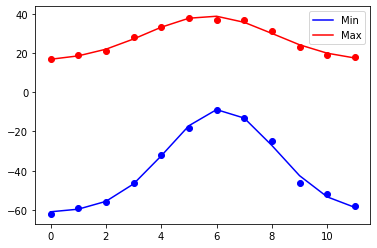

In [4]:
from scipy import optimize



# The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):
maxT = np.array([17,19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
minT = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])




#Plotting these temperature extremes.
x = np.arange(len(maxT))
plt.scatter(x, maxT,  color = 'r')
plt.scatter(x, minT,  color = 'b')




#Define a function that can describe min and max temperatures. 
def f(x, A, nu, sigma, c):
    return A*np.exp(-0.5*((x-nu)**2)/sigma) + c




#Fit this function to the data with scipy.optimize.curve_fit().
params_min, params_covariance_min = optimize.curve_fit(f, x, minT, p0=[2, 6, 2, -60])
perr_min= np.sqrt(np.diag(params_covariance_min))
params_max, params_covariance_max = optimize.curve_fit(f, x, maxT, p0=[2, 6, 2, -60])
perr_max= np.sqrt(np.diag(params_covariance_max))
print(f"Min curve parameters: {params_min}")
print(f"Min curve parameters: {params_max}")





# Plot the result. Is the fit reasonable? If not, why?
plt.plot(x, f(x, params_min[0], params_min[1], params_min[2], params_min[3]), color = 'b', label = 'Min')
plt.plot(x, f(x, params_max[0], params_max[1], params_max[2], params_max[3]), color = 'r', label = 'Max')
plt.legend(loc = 'best')
plt.show()

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [4]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-01-17 14:18:48--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-01-17 14:18:49--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce8651d341aa7a28312eaf92d6c.dl.dropboxusercontent.com/cd/0/inline/Bd9UQ5nf2tlRwLDkonCS_RJOHOv1enkV3HbRoub9Q_JR3TtPDvmWKcDTS59vZko3VhYTObJG_rr-XPUhuIhXYNk-T_acGw5SbgwvQrloz7sh_WynF-W1iMsK76aJUkLIWV12MNXowXWMINuc8ihua87J/file# [following]
--2022-01-17 14:18:49--  https://uce8651d341aa7a28312eaf92d6c.dl.dropboxusercontent.com/cd/0/inline/Bd9UQ5nf2tlRwLDkonCS_RJOHOv1enkV3HbRoub9Q_JR3TtPDvmWKcDTS59vZko3VhYTObJG_rr-XPUhuIhXYNk-T_acGw5SbgwvQ

1460.8115855118722
p-value: 0.0
Nothing to write home about


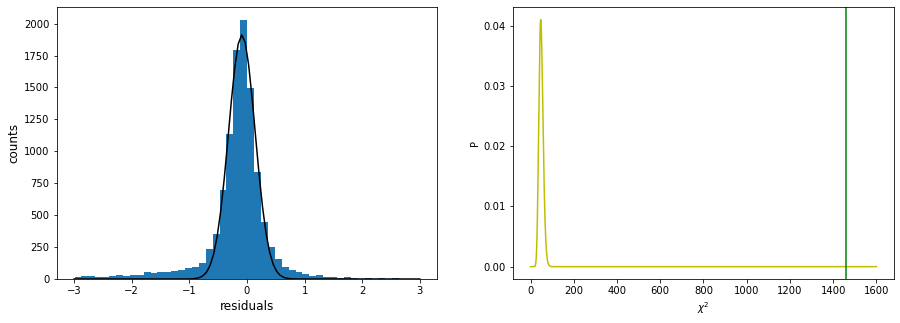

In [21]:
import pandas as pd
from scipy import stats



#gauss function
def G(x,c,mu,sig):
    return c*np.exp(-(x-mu)**2/(2*sig**2))


Meli = np.load('data/residuals_261.pkl', allow_pickle=True)
data_list = Meli.tolist()
df = pd.DataFrame(data_list)
df_p = df[abs(df['residuals']) < 3]





fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))



n_bin = 50
ax1.hist(df_p['residuals'],bins=n_bin)




counts, bin_edges = np.histogram(df_p['residuals'],bins=n_bin)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
err = counts**(1/2)




x = np.linspace(-3,3,100)





popt, pcov = optimize.curve_fit(G,bin_centres,counts)
ax1.plot(x,G(x,popt[0],popt[1],popt[2]),color='black')
ax1.set_ylabel('counts', size = 'large')
ax1.set_xlabel('residuals', size = 'large')



chi2 = np.sum((counts - G(bin_centres,popt[0],popt[1],popt[2]))**2/err**2)
print(chi2)



#second
p = np.arange(0, 1600, 0.1)
ax2.plot(p, stats.chi2.pdf(p, df=len(counts)-1), color= 'y')
ax2.axvline(chi2, color='g')
ax2.set_xlabel('$\u03C7^2$')
ax2.set_ylabel('P')

pvalue = 1. - stats.chi2.cdf(K2, len(counts)-1)
print('p-value:', pvalue)
print('Nothing to write home about')

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [23]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -p ~/data/

--2022-01-17 14:36:28--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2022-01-17 14:36:28--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb835c3f261c6ffe6a47d9558f4.dl.dropboxusercontent.com/cd/0/inline/Bd_Z4vbBk-sU5E6mn4grN487waKzS3eZ4tw30oCgAzrxX71lgmDUGLQ8CSWWJDv1pk5V2l81Qp7Gz9_5WcncZ_ytg_0MB1VuUPRKVb8ujAh3yIl63x-1H1mBREhQoo2yq4L4Q9B3n9AsmdIZIA_gBdNT/file# [following]
--2022-01-17 14:36:29--  https://ucb835c3f261c6ffe6a47d9558f4.dl.dropboxusercontent.com/cd/0/inline/Bd_Z4vbBk-sU5E6mn

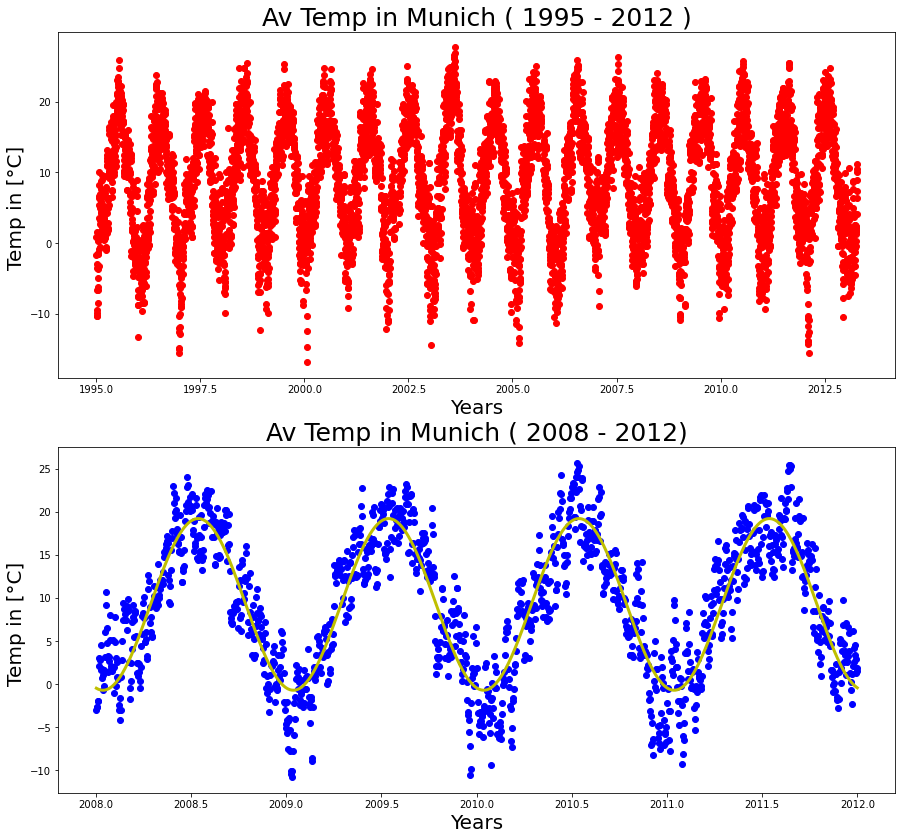

In [36]:
import matplotlib.pyplot



file_name='www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt'





date , Temp = np.loadtxt(file_name , unpack=True) 

fig , ax = plt.subplots(nrows = 2 , ncols = 1 , figsize=(15,14))


# fit

def fit (t , a , b , c):
    return a*np.cos(t*2*np.pi +b)+c




indx = np.abs(Temp) < 90
date = date[indx]
Temp = Temp[indx]


#plotting average temp in Munich(1995-2012)

ax[0].scatter(date , Temp , label='Data', color = 'r')
ax[0].set_title("Av Temp in Munich ( 1995 - 2012 )", fontsize=25)
ax[0].set_ylabel("Temp in [°C] " , fontsize=20)
ax[0].set_xlabel("Years" , fontsize=20)


indx = np.array([d for d in range(len(date)) if 2008 <= date[d] <= 2012])
time = date[indx]
T= Temp[indx]




#plotting average temp in Munich (2008-2012)

ax[1].scatter(time , T , label='Data', color = 'b')
ax[1].set_title("Av Temp in Munich ( 2008 - 2012)", fontsize=25)
ax[1].set_ylabel("Temp in [°C] " , fontsize=20)
ax[1].set_xlabel("Years" , fontsize=20)

popt_f , pcov_f  = optimize.curve_fit(fit, time, T, p0=[17 , 0 , 6])

ax[1].plot(time, fit(time, *popt_f), color='y', lw=3, label='Fitted Function')

In [38]:
#dealing with questions in this part:



#the best paramters and best fitted function


print("Best parameters : \n  a = %.4f , b = %.4f , c = %.4f" %(popt_f[0] , popt_f[1] , popt_f[2]))
print("\nSo Best fitted function is -->  𝑓 (𝑥) = (%.4f) * cos( 2*pi * 𝑥 %.4f ) + %.4f "%(popt_f[0] , popt_f[1] , popt_f[2]))




#What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

print("\nThe overall average Temperature in Munich is %3.2f °C " %(np.mean(Temp)))
print("Coldest time of the year in Munich : Measured T %3.2f °C  vs Predicted T %3.2f °C" %(np.min(Temp) , fit_f(date[np.argmin(Temp)] , *popt_f)))
print("Hottest time of the year in Munich : Measured T %3.2f °C  vs Predicted T %3.2f °C" %(np.max(Temp) , fit_f(date[np.argmax(Temp)] , *popt_f)))





#What is the meaning of the  𝑏  parameter, and what physical sense does it have?

print("\nThe (the phase shift b) 𝑏 matches the Temperature to the correct period of the year.")
print("With the correct 𝑏 have as a result a low temperature in winter for half of the year and \na high T for the other half during summer")

Best parameters : 
  a = -9.9620 , b = -0.2346 , c = 9.2628

So Best fitted function is -->  𝑓 (𝑥) = (-9.9620) * cos( 2*pi * 𝑥 -0.2346 ) + 9.2628 

The overall average Temperature in Munich is 8.93 °C 
Coldest time of the year in Munich : Measured T -16.78 °C  vs Predicted T -0.51 °C
Hottest time of the year in Munich : Measured T 27.67 °C  vs Predicted T 18.03 °C

The (the phase shift b) 𝑏 matches the Temperature to the correct period of the year.
With the correct 𝑏 have as a result a low temperature in winter for half of the year and 
a high T for the other half during summer


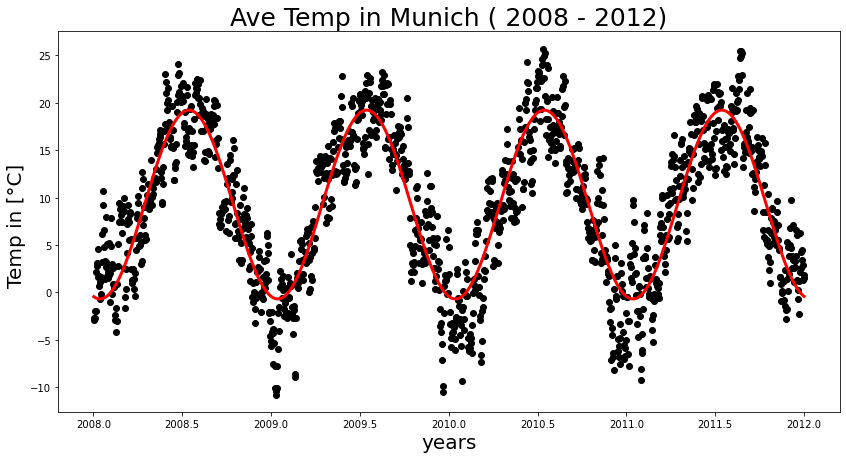

In [45]:
#𝑔(𝑥)

 
#fitting function

def fitG (t , a , b , c , d):
    return a*np.cos(t*2*np.pi*b +c )+d    
    
popt_g , pcov_g  = optimize.curve_fit(fitG, time, T, p0=[17 , 1 ,  0 , 6])

fig3 ,ax3 = plt.subplots(figsize=(14,7))
ax3.scatter(time , T , label='Data', color= 'k')
ax3.set_title("Ave Temp in Munich ( 2008 - 2012)", fontsize=25)
ax3.set_ylabel("Temp in [°C] " , fontsize=20)
ax3.set_xlabel("years" , fontsize=20)
    
ax3.plot(time, fitG(time, *popt_g), color='r', lw=3, label='Fitted Function')

In [50]:
#last part


rss_f = np.sum( (T - fit(time , *popt_f))**2 )

rss_g = np.sum( (T - fitG(time , *popt_g))**2 )

print("RSS for 𝑓(𝑥): %3.2f, RSS for 𝑔(𝑥):  %3.2f "%(rss_f, rss_g))





def func(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter:", "YES" if CL < 0.10 else "NO")
    return CL




cl = func(rss_f , rss_g , 3-1 , 4-1 , len(time) , verbose=True)

RSS for 𝑓(𝑥): 18669.52, RSS for 𝑔(𝑥):  18669.23 
CL: 0.880 , additional parameter: NO
